<a href="https://colab.research.google.com/github/Narcissa18/HTML-Project/blob/master/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>

AI's ability to understand human emotions is cruicial as it can improve communication and interaction in various fields. For example, in customer service, AI can understand customer satisfaction and respond appropriately. In healthcare, it can help monitor patients' emotional well-being. Also, it enhances human-robot interactions, making them more natural and empathetic.

**The objectives:** What is the intended goal?<br>

The objective is to use Deep Learning to create a model that can identify facial emotions and classify into 4 groups - happy, sad, surprised, and neutral.

**The key questions:** What are the key questions that need to be answered?<br> How accurately deep learning models can identify human facial emotions?

**The problem formulation:** What are we trying to solve using data science? This could solve a problem of automating human emotion analysis and can be applied in psychology, customer services, market researches and so on.



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

import seaborn as sns

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
import shutil
import zipfile
import os
import time

drive_path = '/content/drive/MyDrive/DataScience/Facial_emotion_images.zip'
# Path to copy the zip file to local
local_zip_path = '/content/Facial_emotion_images.zip'
# Extraction path
extract_path = '/content'

# Copy the file locally
shutil.copy(drive_path, local_zip_path)

# Ensure the directory exists
os.makedirs(extract_path, exist_ok=True)

start_time = time.time()

# Unzip the file using Python's zipfile
with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

end_time = time.time()
print(f"Unzipped the file to {extract_path} in {end_time - start_time:.2f} seconds")

Unzipped the file to /content in 1.94 seconds


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [ ]:
from PIL import Image

def visualize_class_images(base_path, class_name, folder='train', num_images=10):
    class_path = os.path.join(base_path, folder, class_name)

    images = os.listdir(class_path)[:num_images]  # Get images from the class
    if len(images) == 0:
        print(f"No images found in: {class_path}") #handling error
        return

    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 2, 2))

    for j, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        axs[j].imshow(img)
        axs[j].axis('off')
        axs[j].set_title(class_name, fontsize=12)

    plt.tight_layout()
    plt.show()

# Base path to your unzipped dataset
base_path = '/content/Facial_emotion_images'




### **Happy**

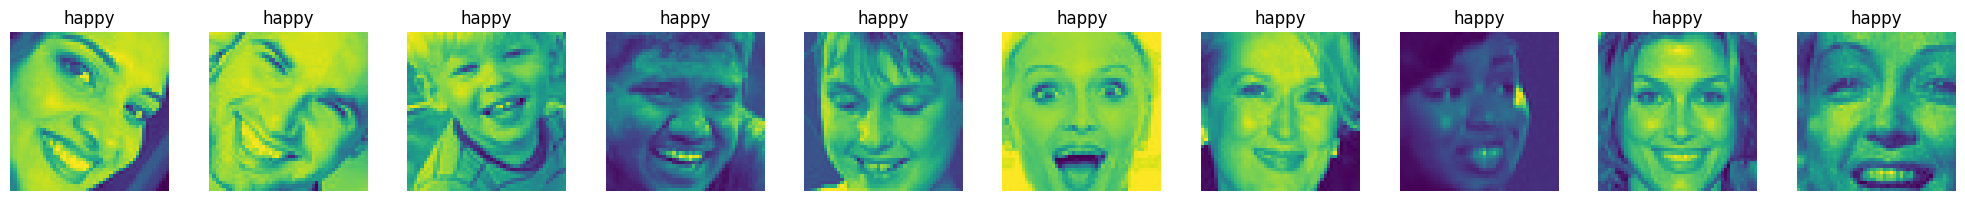

In [ ]:
# Specifying the class name
class_name = 'happy'

# Visualize images from the training set
visualize_class_images(base_path, class_name, folder='train')

**Observations and Insights:**
People with happy expressions often show features like smiling with their teeth and having narrowed eyes, or they might have narrowed eyes and open mouths at the same time. These features really set them apart from other emotions.

### **Sad**

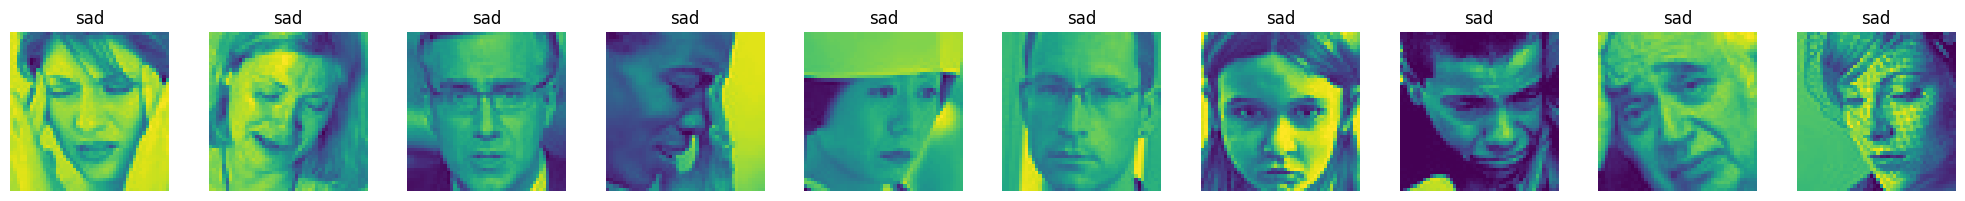

In [ ]:
# Specifying the class name
class_name = 'sad'

# Visualize images from the training set for the specified class
visualize_class_images(base_path, class_name, folder='train')

**Observations and Insights:**
People with sad expressions often show features like closed lips, having downcast gaze, eyebrows drawn together and/or corner of mouth turned downwards.

### **Neutral**

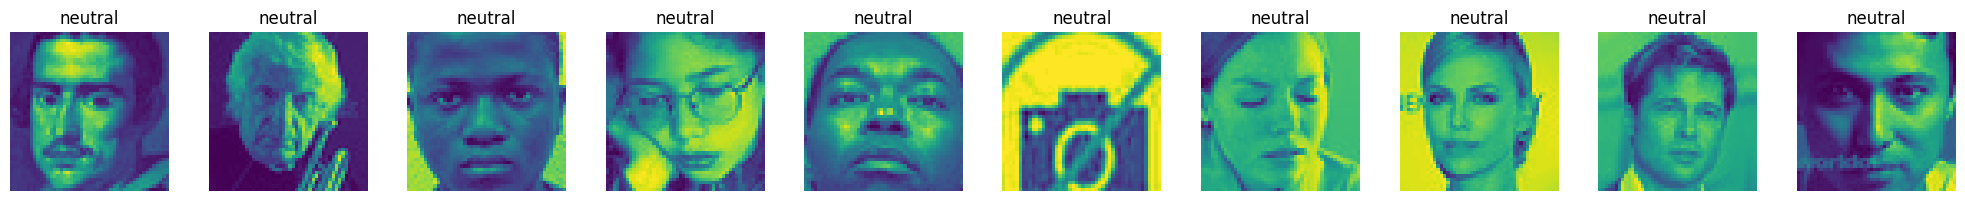

In [ ]:
# Specifying the class name
class_name = 'neutral'

# Visualize images from the training set
visualize_class_images(base_path, class_name, folder='train')

**Observations and Insights:**
Neutral face features include straight gaze, closed lips, eyebrows and whole face features relaxed.

### **Surprised**

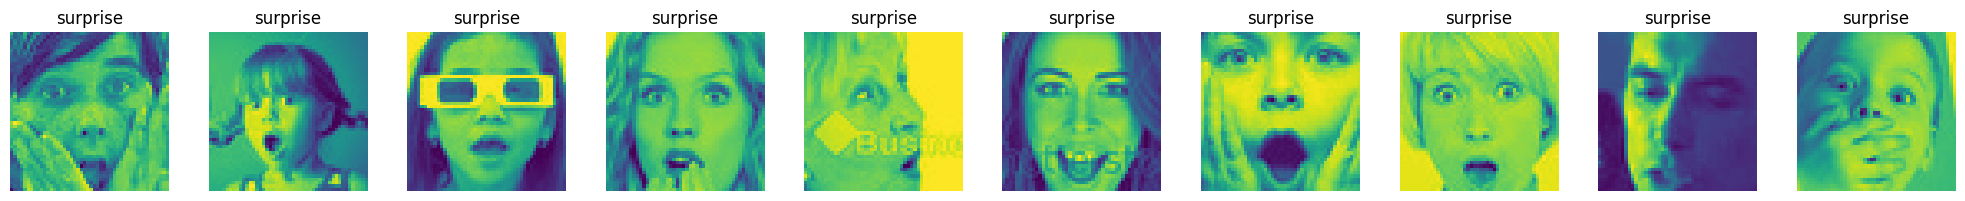

In [ ]:
# Specifying the class name
class_name = 'surprise'

# Visualize images from the training set
visualize_class_images(base_path, class_name, folder='train')

**Observations and Insights:**
The most distinctive features are open mouths, big eyes, and raised eyebrows, sometimes accompanied with hands on cheeks.

## **Checking Distribution of Classes**

In [ ]:
#function to identify the image count per class
def count_images_per_class(base_path, folder='train'):
    classes = ['sad', 'happy', 'surprise', 'neutral']
    class_counts = {}

    for c in classes:
        class_path = os.path.join(base_path, folder, c)
        num_images = len(os.listdir(class_path))
        class_counts[c] = num_images

    return class_counts

# Count images in the train set
train_class_counts = count_images_per_class(base_path, folder='train')
print("Train set class distribution:")
print(train_class_counts)

# Count images in the validation set
validation_class_counts = count_images_per_class(base_path, folder='validation')
print("\nValidation set class distribution:")
print(validation_class_counts)

# Count images in the test set
test_class_counts = count_images_per_class(base_path, folder='test')
print("\nTest set class distribution:")
print(test_class_counts)

Train set class distribution:
{'sad': 3982, 'happy': 3976, 'surprise': 3173, 'neutral': 3978}

Validation set class distribution:
{'sad': 1139, 'happy': 1825, 'surprise': 797, 'neutral': 1216}

Test set class distribution:
{'sad': 32, 'happy': 32, 'surprise': 32, 'neutral': 32}


**Observations and Insights:**

Each set contains similiar number of images per class. Training set has relatively balanced, except for "surprise" class. Validation and test sets are rather smaller, which is typical for these data sets. Imbalance in train set may cause bias towards majority emotion classes, as we have less examples for "Surprise" class. It may not get enough attention during training, and may result in lower accuracy too.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
train_datagen_grayscale = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator_grayscale = train_datagen_grayscale.flow_from_directory(
    '/content/Facial_emotion_images/train',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

validation_datagen_grayscale = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator_grayscale = validation_datagen_grayscale.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

test_datagen_grayscale = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator_grayscale = test_datagen_grayscale.flow_from_directory(
    '/content/Facial_emotion_images/test',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

CNNs are the right approach for facial emotion recognition as they can detect edges, features and complex patterns like facial features.  They learn a hierarchy of features. Early layers might detect edges and textures, while deeper layers might recognize facial parts and entire facial expressions.

ANNs are not well-suited for image data due to their inability to handle spatial relationships and their high parameter count, which can lead to inefficiencies and overfitting.

### **Creating the Base Neural Network**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

model_grayscale = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)  # 4 classes: happy, sad, surprise, neutral
])

# Print the  grayscale model summary
model_grayscale.summary()

model_rgb = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)  # 4 classes: happy, sad, surprise, neutral
])

# Print the rgb model summary
model_rgb.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

### **Compiling and Training the Model**

In [ ]:
import random
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
model_grayscale.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_grayscale = model_grayscale.fit(
    train_generator_grayscale,
    steps_per_epoch=len(train_generator_grayscale),
    epochs=4,
    validation_data=validation_generator_grayscale,
    validation_steps=len(validation_generator_grayscale))




Epoch 1/4
473/473 [==============================] - 59s 123ms/step - loss: 0.9963 - accuracy: 0.5679 - val_loss: 0.9951 - val_accuracy: 0.5779
Epoch 2/4
473/473 [==============================] - 58s 123ms/step - loss: 0.9517 - accuracy: 0.5967 - val_loss: 1.0020 - val_accuracy: 0.5648
Epoch 3/4
473/473 [==============================] - 58s 123ms/step - loss: 0.9173 - accuracy: 0.6101 - val_loss: 0.9618 - val_accuracy: 0.5990
Epoch 4/4
473/473 [==============================] - 58s 123ms/step - loss: 0.8814 - accuracy: 0.6264 - val_loss: 0.8977 - val_accuracy: 0.6267


In [ ]:

train_datagen_rgb = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator_rgb = train_datagen_rgb.flow_from_directory(
    '/content/Facial_emotion_images/train',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

validation_datagen_rgb = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator_rgb = validation_datagen_rgb.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

test_datagen_rgb = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator_rgb = test_datagen_rgb.flow_from_directory(
    '/content/Facial_emotion_images/test',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')





Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
#Compiling RGB CNN model
model_rgb.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_rgb = model_rgb.fit(
    train_generator_rgb,
    steps_per_epoch=len(train_generator_rgb),
    epochs=4,
    validation_data=validation_generator_rgb,
    validation_steps=len(validation_generator_rgb))

Epoch 1/4
473/473 [==============================] - 162s 339ms/step - loss: 1.4020 - accuracy: 0.3779 - val_loss: 1.1724 - val_accuracy: 0.4782
Epoch 2/4
473/473 [==============================] - 160s 338ms/step - loss: 1.1731 - accuracy: 0.4749 - val_loss: 1.1479 - val_accuracy: 0.4917
Epoch 3/4
473/473 [==============================] - 161s 341ms/step - loss: 1.0957 - accuracy: 0.5149 - val_loss: 1.0130 - val_accuracy: 0.5495
Epoch 4/4
473/473 [==============================] - 161s 340ms/step - loss: 1.0085 - accuracy: 0.5658 - val_loss: 0.9641 - val_accuracy: 0.5813


### **Evaluating the Model on the Test Set**

In [ ]:
test_loss, test_acc = model_grayscale.evaluate(test_generator_grayscale, steps=len(test_generator_grayscale))
print(f'Test accuracy for grayscale model: {test_acc}')

test_loss, test_acc = model_rgb.evaluate(test_generator_rgb, steps=len(test_generator_rgb))
print(f'Test accuracy for rgb model: {test_acc}')

4/4 [==============================] - 0s 21ms/step - loss: 0.8216 - accuracy: 0.6562
Test accuracy for grayscale model: 0.65625
4/4 [==============================] - 0s 36ms/step - loss: 0.9880 - accuracy: 0.5781
Test accuracy for rgb model: 0.578125


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


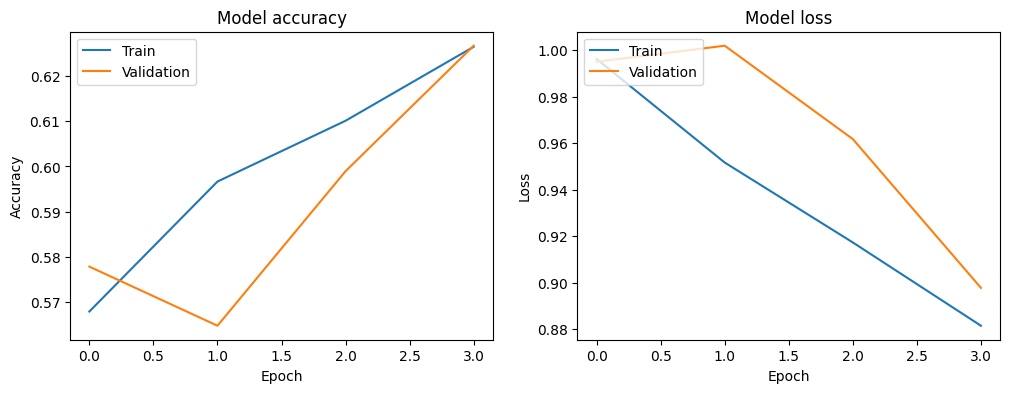

In [ ]:
# Print the history keys to see what metrics are available
print(history_grayscale.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_grayscale.history['accuracy'])
plt.plot(history_grayscale.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_grayscale.history['loss'])
plt.plot(history_grayscale.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


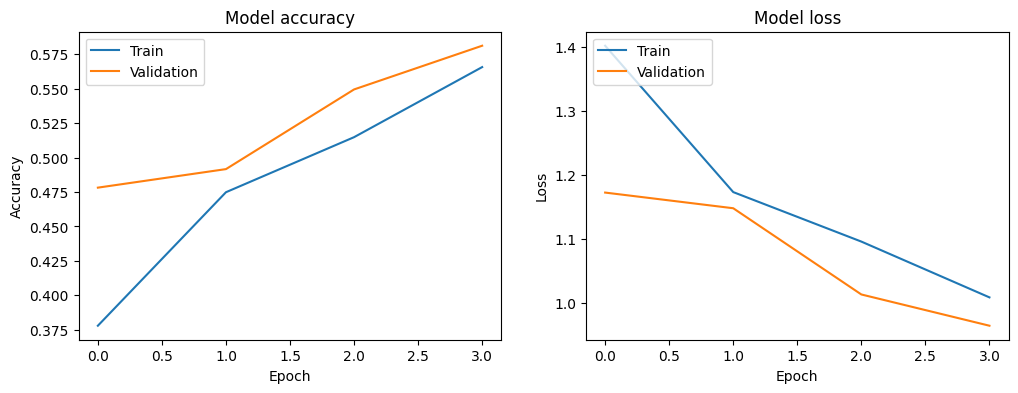

In [ ]:
# Print the history keys to see what metrics are available
print(history_rgb.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rgb.history['accuracy'])
plt.plot(history_rgb.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_rgb.history['loss'])
plt.plot(history_rgb.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations and Insights:**
Model behaved the same for train, validation and test sets, which shows that there is no overfitting. 65% of test dataset accuracy shows that we need to make an improvement in the model.

Dataset is comprised of grayscale images, therefore grayscale model, which is using one channel is more effective compared to rgb model, which is using three channels. Using RGB model on grayscale images adding more redundant information and decreasing accuracy. Accuracy is 62% and 56% on the grayscale and rgb train datasets respectively. On validation dataset, grayscale is at 62%, whereas rgb model performed poorly at 58% on accuracy.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
import tensorflow.keras as keras

# Clear previous Keras session
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model_2(input_shape=(224, 224, 1), num_classes=4):
    model = Sequential()

    # First Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Batch Normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

     # MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Batch Normalization layer
    model.add(BatchNormalization())

    # Flattenning the output from the previous layer
    model.add(Flatten())

    # Dense layer with LeakyReLU activation
    model.add(Dense(units=32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    # Output layer with softmax activation
    model.add(Dense(units=num_classes, activation='softmax'))

    return model

# Creating the model and printing the summary
model = cnn_model_2()
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 16)      160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 224, 224, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                     

### **Compiling and Training the Model**

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator_grayscale,
                    steps_per_epoch=len(train_generator_grayscale),
                    epochs=4,
                    validation_data=validation_generator_grayscale,
                    validation_steps=len(validation_generator_grayscale))


Epoch 1/4
473/473 [==============================] - 62s 125ms/step - loss: 12.8942 - accuracy: 0.3187 - val_loss: 1.3657 - val_accuracy: 0.2700
Epoch 2/4
473/473 [==============================] - 58s 123ms/step - loss: 1.3487 - accuracy: 0.3818 - val_loss: 1.4483 - val_accuracy: 0.2654
Epoch 3/4
473/473 [==============================] - 58s 123ms/step - loss: 1.3772 - accuracy: 0.3834 - val_loss: 1.3359 - val_accuracy: 0.3398
Epoch 4/4
473/473 [==============================] - 58s 123ms/step - loss: 1.4587 - accuracy: 0.3858 - val_loss: 1.3059 - val_accuracy: 0.4199


### **Evaluating the Model on the Test Set**

In [ ]:
test_loss, test_acc = model_grayscale.evaluate(test_generator_grayscale, steps=len(test_generator_grayscale))
print(f'Test accuracy for the second CNN model: {test_acc}')

4/4 [==============================] - 0s 19ms/step - loss: 0.8216 - accuracy: 0.6562
Test accuracy for the second CNN model: 0.65625


**Observations and Insights:**

Base NN Performance
Train Accuracy: 62%
Validation Accuracy: 62%
Test Accuracy: 65%
Second CNN Performance
Train Accuracy: 38%
Validation Accuracy: 42%
Test Accuracy: 65%

Base Neural Network and the second larger Convolutional Neural Network performed with the same level of accuracy on test dataset at 65%. Both NNs might be lacking more complexity to capture facial emotions as overall accuracy of 65% is relatively low.  

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
train_datagen_rgb = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator_rgb = train_datagen_rgb.flow_from_directory(
    '/content/Facial_emotion_images/train',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

validation_datagen_rgb = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator_rgb = validation_datagen_rgb.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

test_datagen_grgb = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator_rgb = test_datagen_grgb.flow_from_directory(
    '/content/Facial_emotion_images/test',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Load the VGG16 model, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False
# Adding custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

58889256/58889256 [==============================] - 4s 0us/step


### **Compiling and Training the VGG16 Model**

In [ ]:
# Compile
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_rgb,
    steps_per_epoch=len(train_generator_rgb),
    epochs=4,
    validation_data=validation_generator_rgb,
    validation_steps=len(validation_generator_rgb)
)

Epoch 1/4
473/473 [==============================] - 161s 336ms/step - loss: 1.2069 - accuracy: 0.4455 - val_loss: 1.0890 - val_accuracy: 0.5385
Epoch 2/4
473/473 [==============================] - 158s 335ms/step - loss: 1.1196 - accuracy: 0.5043 - val_loss: 1.1045 - val_accuracy: 0.5220
Epoch 3/4
473/473 [==============================] - 158s 335ms/step - loss: 1.0956 - accuracy: 0.5239 - val_loss: 1.0936 - val_accuracy: 0.5154
Epoch 4/4
473/473 [==============================] - 159s 335ms/step - loss: 1.0682 - accuracy: 0.5360 - val_loss: 1.0930 - val_accuracy: 0.5246


### **Evaluating the VGG16 model**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator_rgb, steps=len(test_generator_rgb))
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 0s 33ms/step - loss: 1.0286 - accuracy: 0.5547
Test accuracy: 0.5546875


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
VGG16:
Train Accuracy: 53%
Validation Accuracy: 52%
Test Accuracy: 55%

With VGG16 model training the model took significantly longer that base NN and the second CNN models. Despite the time taken, model accuracy is improving significantly in each epoch, which means increasing epoch count will contribute to convergence.

Train and validation accuracy has also improved. VGG16 with custom layers and 4 epochs gave 55% accuracy on a test set, which is an not improvement compared to previous models.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)


In [ ]:
# Load the ResNet50V2 model, excluding the top dense layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

94668760/94668760 [==============================] - 5s 0us/step


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Add custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: happy, sad, surprise, neutral
])

### **Compiling and Training the Model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator_rgb,
    steps_per_epoch=len(train_generator_rgb),
    epochs=4,
    validation_data=validation_generator_rgb,
    validation_steps=len(validation_generator_rgb)
)

Epoch 1/4
473/473 [==============================] - 164s 339ms/step - loss: 0.9920 - accuracy: 0.5941 - val_loss: 0.9106 - val_accuracy: 0.6247
Epoch 2/4
473/473 [==============================] - 159s 336ms/step - loss: 0.8705 - accuracy: 0.6409 - val_loss: 0.9038 - val_accuracy: 0.6255
Epoch 3/4
473/473 [==============================] - 160s 338ms/step - loss: 0.8153 - accuracy: 0.6656 - val_loss: 0.8304 - val_accuracy: 0.6747
Epoch 4/4
473/473 [==============================] - 159s 335ms/step - loss: 0.7990 - accuracy: 0.6732 - val_loss: 0.7948 - val_accuracy: 0.6799


### **Evaluating the ResNet Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator_rgb, steps=len(test_generator_rgb))
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 0s 39ms/step - loss: 0.8120 - accuracy: 0.6562
Test accuracy: 0.65625


**Observations and Insights:**
The accuracies of 66% on the training set, 67% on the validation set, and 68% on the test showed that ResNet modelhas performed quite well, with a balanced and generalizable performance across different data splits.

I have experimented with more epochs (10), where accuracy level dropped, and went back to 4 epochs again.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Set seeds for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
# Load the EfficientNetB0 model, excluding the top dense layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: happy, sad, surprise, neutral
])

### **Compiling and Training the Model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Facial_emotion_images/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

# Train the model
history = model.fit(
    train_generator_rgb,
    steps_per_epoch=len(train_generator_rgb),
    epochs=4,
    validation_data=validation_generator_rgb,
    validation_steps=len(validation_generator_rgb)
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Epoch 1/4
473/473 [==============================] - 157s 332ms/step - loss: 1.3823 - accuracy: 0.2604 - val_loss: 1.3748 - val_accuracy: 0.2289
Epoch 2/4
473/473 [==============================] - 157s 333ms/step - loss: 1.3824 - accuracy: 0.2569 - val_loss: 1.3630 - val_accuracy: 0.3667
Epoch 3/4
473/473 [==============================] - 157s 332ms/step - loss: 1.3823 - accuracy: 0.2628 - val_loss: 1.3705 - val_accuracy: 0.2289
Epoch 4/4
473/473 [==============================] - 160s 338ms/step - loss: 1.3824 - accuracy: 0.2616 - val_loss: 1.3717 - val_accuracy: 0.2289


### **Evaluating the EfficientnetNet Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator_rgb, steps=len(test_generator_rgb))
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 0s 36ms/step - loss: 1.3917 - accuracy: 0.2500
Test accuracy: 0.25


**Observations and Insights:**

Among all Tranfer Learning Architestures, ResNet v2 model performed well at 65% test, 68% validation and 67% on the train dataset.

VGG16 was not great with 55% accuracy on the test dataset.
Transfer learning architectures were trained on ImageNet dataset, which does not necessarily include facial images. This could have caused the low performance on the datasets we have.

EfficientNet was at 25% accurate on test dataset. I have tried to train the model on my dataset of facial images. Despite that model has performed poorly at 26%, 22% and 25% on train, validation and test datasets.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
train_datagen_grayscale = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest')

train_generator_grayscale = train_datagen_grayscale.flow_from_directory(
    '/content/Facial_emotion_images/train',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

validation_datagen_grayscale = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator_grayscale = validation_datagen_grayscale.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

test_datagen_grayscale = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator_grayscale = test_datagen_grayscale.flow_from_directory(
    '/content/Facial_emotion_images/test',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
def cnn_model_5_blocks():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Fourth Convolutional Block
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Fifth Convolutional Block
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output and add Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(4, activation='softmax'))  # 4 classes: happy, sad, surprise, neutral

    return model

# Create a model instance
model = cnn_model_5_blocks()



### **Compiling and Training the Model**

In [ ]:
# Set seeds for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator_grayscale,
    steps_per_epoch=len(train_generator_grayscale),
    epochs=4,
    validation_data=validation_generator_grayscale,
    validation_steps=len(validation_generator_grayscale)
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                 

### **Evaluating the Model on Test Set**

In [ ]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator_grayscale, steps=len(test_generator_grayscale))
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 0s 19ms/step - loss: 1.3902 - accuracy: 0.2500
Test accuracy: 0.25


**Observations and Insights:**
Train accuracy: 25%, validation accuracy: 24%, test accuracy: 25%), here are some observations and insights along with possible actions to improve the model. Low accuracy may mean that we need more complexity in our models to capture intricacies of facial emotion. The last model was complex convolutional neural network,  but may still not be sufficient for this task.



### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
# Load the ResNet50V2 model, excluding the top dense layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: happy, sad, surprise, neutral
])

4/4 [==============================] - 1s 35ms/step


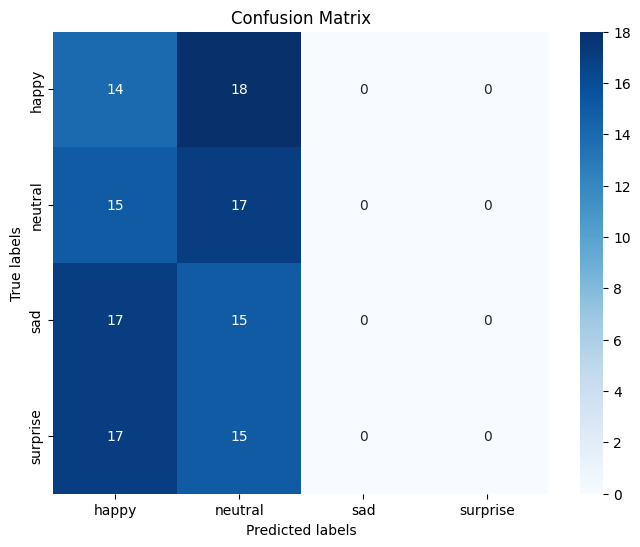

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Make predictions
predictions = model.predict(test_generator_rgb)

# Get class labels from the generator
true_cls = test_generator_rgb.classes

# Get predicted classes
predicted_cls = np.argmax(predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_cls, predicted_cls)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_cls, predicted_cls)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator_rgb.class_indices,
            yticklabels=test_generator_rgb.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Observations and Insights:**

VGG16, ResNet, EfficientNet (on grayscale dataset)

The models are underperforming on the RGB dataset compared to grayscale datasets. Accuracy is lower than expected, maybe due to the absence of color information. These models were originally trained on RGB images in ImageNet, which may not be suitable for grayscale image dataset.

The custom CNN model shows low accuracy across all datasets (train, validation, test).
The model may be underfitting the dataset, as evidenced by similar performance across all datasets.

The model has been made more complex compared to previous versions, but it may not be sufficiently deep or wide for this task.

Data augmentation is applied, but it may need further augmentation techniques or intensity to improve generalization.

Confusion matrix displays how the model is identifying happy, sad and neutral emotions as happy and not able to detect sad or surprise emotions correctly.

I propose to move forward with ResNet v2 model, as it is providing 65% accuracy on test dataset and computationally effective compared to other models.

## **Conclusion:**
The models evaluated, including VGG16, ResNet v2, EfficientNet, and a custom CNN model, have shown challenges when applied directly to grayscale image datasets. They consistently show lower accuracy across train, validation, and test sets, indicating difficulty in learning from grayscale features alone. This highlights the importance of color information in model performance, suggesting that further adjustments or alternative approaches may be necessary to effectively model grayscale data. Future efforts should focus on adapting models or developing custom architectures optimized for grayscale image processing to achieve better performance.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?